# Исследование действий пользователей мобильного приложения

В моём распоряжении данные стартапа, который занимается продажей продуктов питания. Мне нужно изучить воронку продаж, узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах и на каких именно. В том числе провести A/A/B тестирование

**Цель исследования:** Определить, как будет влиять новый шрифт на пользователей и ответить на вопрос, будет ли она эффективным с точки зрения продаваемости

**Ход исследования:** Данные о действиях пользователей я получу из файла '/datasets/logs_exp.csv'. Данные могут быть необработанны или с какими-нибудь нарушениями, поэтому для начала нам понадобится обзор данных и последующая предобработка (если потребуется).

Проверю данные на ошибки и влияющие на моё исследование и недочеты. После на предобработки попытюась исправить в максимально эффективной форме. Далее создам необходимы столбцы и приступлю к исследованию. Как итог хотел бы сделать заключение о своих этапах работы. Она пройдет в "n" этапов:

1. Обзор данных;

2. Предобработка данных;

3. Анализ данных;

4. Проверка гипотез; 

5. Вывод.


In [1]:
#импорт бибилиотек
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st
import numpy as np
import math as mth
import statistics
import plotly.express as px

# Шаг 1

In [2]:
data = pd.read_csv(r'C:\Users\Богдан\Downloads\logs_exp.csv', '\t')
pd.set_option("max_colwidth", 300)
data

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


# Шаг 2

In [4]:
#замена названий столбцов
data = data.rename(columns = {'EventName' : 'event_name', 'DeviceIDHash' : 'device_id_hash', 'EventTimestamp' : 'event_time_stamp', 'ExpId' : 'exp_id'})
data

,event_name,device_id_hash,event_time_stamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [5]:
#пропуски в файле
null = data.isnull().sum()
print(null)

event_name          0
device_id_hash      0
event_time_stamp    0
exp_id              0
dtype: int64


In [6]:
#проверка типов данных
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   event_name        244126 non-null  object
 1   device_id_hash    244126 non-null  int64 
 2   event_time_stamp  244126 non-null  int64 
 3   exp_id            244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [7]:
#замена типа данных
data['event_time_stamp'] = pd.to_datetime(data['event_time_stamp'], unit='s')


In [8]:
data

,event_name,device_id_hash,event_time_stamp,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   event_name        244126 non-null  object        
 1   device_id_hash    244126 non-null  int64         
 2   event_time_stamp  244126 non-null  datetime64[ns]
 3   exp_id            244126 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ MB


Пропуски в данных отсутсвуют. Произвел замену типа только у одного стоолбца, так как он не соотвествовал временному типу

In [10]:
#добавление столбца дат
data['date'] = pd.to_datetime(data['event_time_stamp']). dt.normalize ()
data

,event_name,device_id_hash,event_time_stamp,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [11]:
print('Кол-во дубликатов встретившихся в сете:', data.duplicated().sum())

Кол-во дубликатов встретившихся в сете: 413


In [12]:
data = data.drop_duplicates()
data

,event_name,device_id_hash,event_time_stamp,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [13]:
print('Кол-во пересечений в сете:', data.groupby('device_id_hash')['exp_id'].nunique().reset_index().query('exp_id > 1').count())

Кол-во пересечений в сете: device_id_hash    0
exp_id            0
dtype: int64


**Вывод:** В данном шаге была проделана работа по замене названий столбцов, так как изначльный формат был не совсем удобен в работе (был не в "змеинном" формате). Так же я проделал работу по поиску и удалению дубликатов и пустых строк. И для удобной работы заменил тип данных дат вдобавок дабаленному столбцу только с датой

# Шаг 3

In [14]:
data

,event_name,device_id_hash,event_time_stamp,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [15]:
#кол-во событий в логе
total_ev_log = data['event_name'].count()
print('Количество событий в логе:', total_ev_log)

Количество событий в логе: 243713


In [16]:
#кол-во пользователей в логе
user_ev_log = data['device_id_hash'].nunique()
print('Количество пользователей в логе:', user_ev_log)

Количество пользователей в логе: 7551


In [17]:
#среднее кол-во событий на пользователя
mean_ev_log = round(total_ev_log / user_ev_log)
print('Среднее кол-во событий на одного пользователя:', mean_ev_log)

Среднее кол-во событий на одного пользователя: 32


In [18]:
data_pvt =  data.pivot_table(index = 'device_id_hash', values = 'event_name', aggfunc = 'count')
data_pvt

,event_name
device_id_hash,
6888746892508752,1
6909561520679493,5
6922444491712477,47
7435777799948366,6
7702139951469979,137
...,...
9217594193087726423,9
9219463515465815368,17
9220879493065341500,7


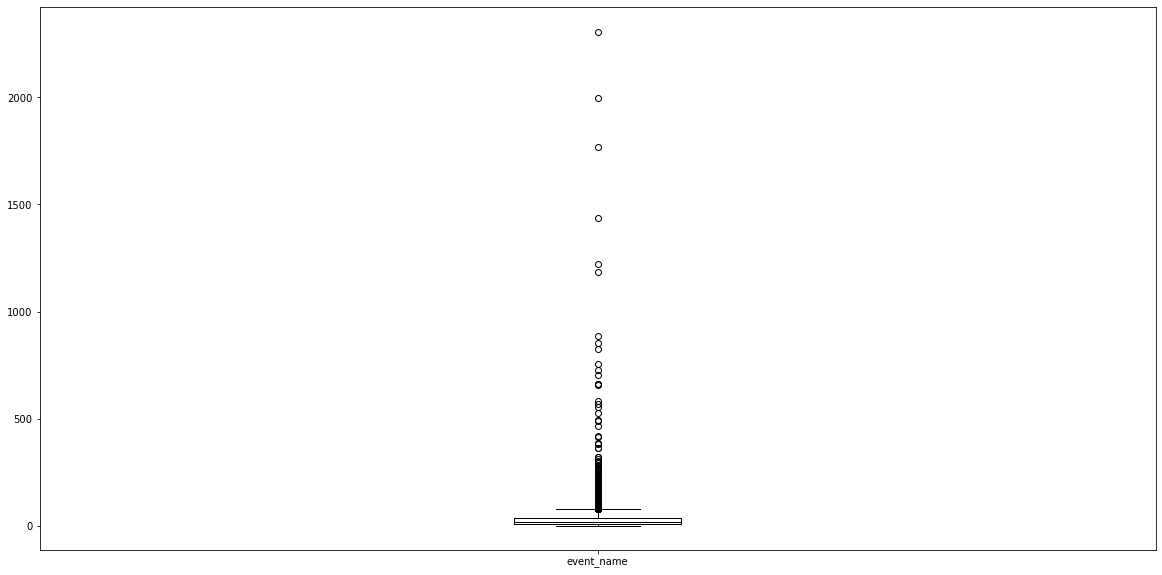

In [19]:
plt.figure(figsize=(20, 10))
data_pvt.boxplot(column=['event_name'], grid= False , color='black');

In [20]:
data_pvt.median()

event_name    20.0
dtype: float64

**Вывод:** Нашел среднее значение событиый на одного пользователя, и оно равно 32. Проведя небольшое дополнительное исследование и построив график boxplot, было обнаруженно, что а) выбросы точно есть; б) среднее значение отличается от медианного (20). Значит, можем сделать вывод, что выбросы критично влияют на средний показатель одного пользователя (12 единиц)

In [21]:
#дата первого и последнего события
date_min = data['event_time_stamp'].min()
date_max = data['event_time_stamp'].max()

print('Дата первого события в логе:', date_min)
print('Дата последнего события в логе:', date_max)

Дата первого события в логе: 2019-07-25 04:43:36
Дата последнего события в логе: 2019-08-07 21:15:17


**Даты первых событий и последних сгруппированных по событиям**

In [22]:
data.groupby('event_name').agg({'event_time_stamp' : ['first', 'last']})

event_time_stamp                    
                                      first                last
event_name                                                     
CartScreenAppear        2019-07-25 11:28:47 2019-08-07 21:07:08
MainScreenAppear        2019-07-25 04:43:36 2019-08-07 21:14:58
OffersScreenAppear      2019-07-25 14:50:42 2019-08-07 21:15:17
PaymentScreenSuccessful 2019-07-25 11:28:47 2019-08-07 21:07:08
Tutorial                2019-07-26 18:03:59 2019-08-07 20:23:52

**График по датам**

Text(0, 0.5, 'Кол-во человек')

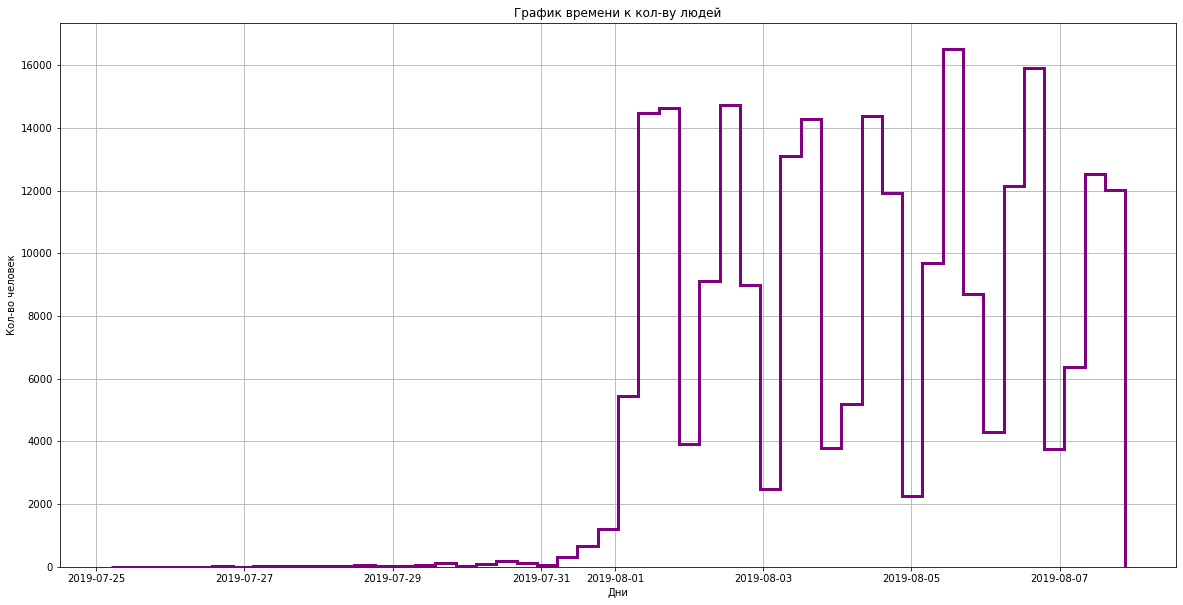

In [23]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.grid()

plt.hist(data['event_time_stamp'], bins = 50, histtype='step', color = 'purple', linewidth= 3)
plt.title('График времени к кол-ву людей')
plt.xlabel('Дни')
plt.ylabel('Кол-во человек')
#plt.legend();

In [24]:
#кол-во событий в логе
len_data = len(data)
len_data

243713

**Кол-во пользователей и сколько раз их отнесли к группе исследования**

In [25]:

data.groupby('exp_id').agg({'device_id_hash' : ['nunique', 'count']})

device_id_hash       
              nunique  count
exp_id                      
246              2489  80181
247              2520  77950
248              2542  85582

In [26]:
data_users_log = data.groupby('exp_id').agg({'device_id_hash' : 'nunique'})
data_users_log

,device_id_hash
exp_id,
246,2489
247,2520
248,2542


**События и пользователи, которые отбрасываем**

In [27]:
data = data.loc[data['date'] > '2019-07-31'].reset_index()
data

,index,event_name,device_id_hash,event_time_stamp,exp_id,date
0,2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
1,2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2,2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
3,2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
4,2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
...,...,...,...,...,...,...
240882,244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
240883,244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
240884,244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
240885,244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


**График для проверки удаления ненужных строк**

Text(0, 0.5, 'Кол-во человек')

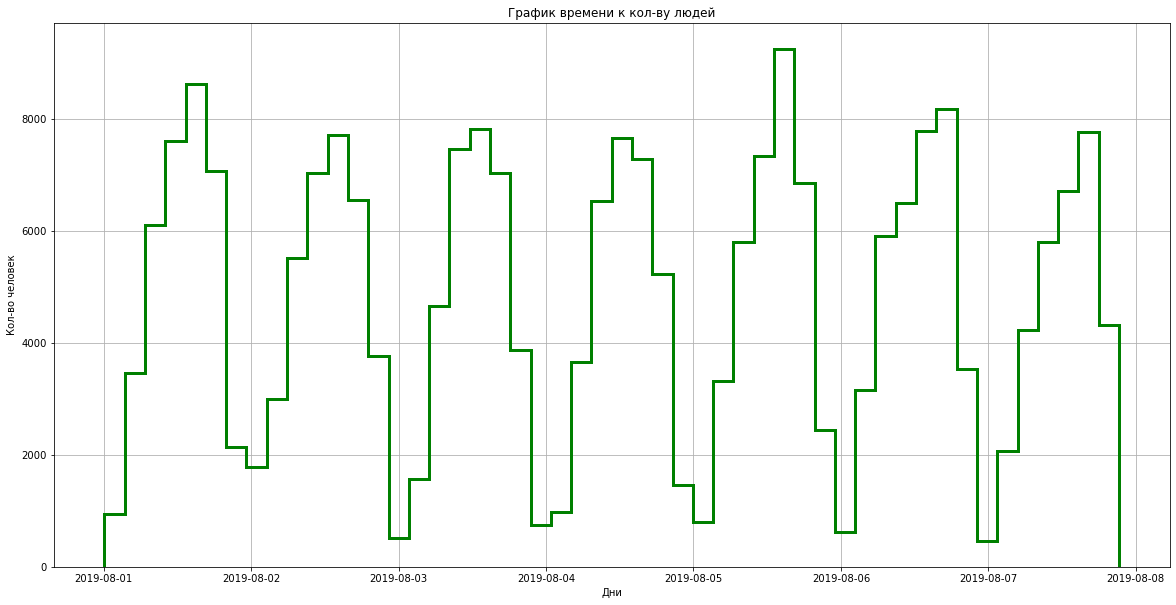

In [28]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.grid()

plt.hist(data['event_time_stamp'], bins = 50, histtype='step', color = 'green', linewidth= 3)
plt.title('График времени к кол-ву людей')
plt.xlabel('Дни')
plt.ylabel('Кол-во человек')

In [29]:
print('Дата первого события в логе после удаления не нужной части:', data['event_time_stamp'].min())
print('Дата последнего события в логе после удаления не нужной части:',data['event_time_stamp'].max())

Дата первого события в логе после удаления не нужной части: 2019-08-01 00:07:28
Дата последнего события в логе после удаления не нужной части: 2019-08-07 21:15:17


**Проверка**

In [30]:
len(data.loc[data['date'] > '2019-07-31'])

240887

In [31]:
print('Кол-во сессий, которые исключил:', len_data - len(data.loc[data['date'] > '2019-07-31']))

Кол-во сессий, которые исключил: 2826


**Кол-во исключенных пользователей по группам исследования**

In [32]:
dr_sum = data_users_log - data.groupby('exp_id').agg({'device_id_hash' : 'nunique'})
dr_sum

,device_id_hash
exp_id,
246,5
247,7
248,5


In [33]:
print('Кол-во пользователей исключенных из исследования:',dr_sum.sum())

Кол-во пользователей исключенных из исследования: device_id_hash    17
dtype: int64


**Кол-во исключенных пользователей по группам исследования в процентах**

In [34]:
dr_round = round((data_users_log - data.groupby('exp_id').agg({'device_id_hash' : 'nunique'}))*100 / data_users_log, 2)

dr_round

,device_id_hash
exp_id,
246,0.20
247,0.28
248,0.20


In [35]:
print('Кол-во пользователей исключенных из исследования в процентном соотношении:', dr_round.sum())

Кол-во пользователей исключенных из исследования в процентном соотношении: device_id_hash    0.68
dtype: float64


**Проверка на наличие трех групп и кол-ва пользователей в них**

In [36]:
data.groupby('exp_id').agg({'device_id_hash' : ['nunique', 'count']})

device_id_hash       
              nunique  count
exp_id                      
246              2484  79302
247              2513  77022
248              2537  84563

**Процентное отношение исходных сессий, к сессиям после удаления**

In [37]:
per_log_users = round((len_data - len(data.loc[data['date'] > '2019-07-31']))*100 / len_data, 2)
print('Кол-во пользователей в %, которые я откинул:', per_log_users)

Кол-во пользователей в %, которые я откинул: 1.16


**Вывод:** Построив график, видно, что основная часть событий происходит в диапазоне дат 2019-08-01 - 2019-08-07. Опираясь на гистограмму и выше написанное можно отбросить данные от 2019-07-25 по 2019-07-31 даты. 

Сделав удаление данных, получаем "новый" лог, с кол-ом данных сессий на 2828 меньше, чем было изначально. После преобразований сделал проверку, и действительно остались данные за вы бранный период, и тот, что отображен на гистограмме. Так же была проведена проверка процентного и количественного соотношения отброшенных пользователей к изначальному кол-ву, и оно составило 0,68%, что является маленьким результатом и не повлияет на общий результат, а в количественном плане было удалено 17 пользователей из 7 551

# Шаг 4

**Пункт 1. Частота появления события**


In [38]:
data

,index,event_name,device_id_hash,event_time_stamp,exp_id,date
0,2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
1,2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2,2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
3,2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
4,2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
...,...,...,...,...,...,...
240882,244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
240883,244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
240884,244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
240885,244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [39]:
data_log_sort = data.groupby('event_name').agg({'device_id_hash' : ['nunique', 'count']}).rename(columns={'nunique' : 'users_nunique_event', 'count' : 'count_event'})
data_log_sort
#.sort_values(by = 'nunique' ,ascending = False)

device_id_hash            
                        users_nunique_event count_event
event_name                                             
CartScreenAppear                       3734       42303
MainScreenAppear                       7419      117328
OffersScreenAppear                     4593       46333
PaymentScreenSuccessful                3539       33918
Tutorial                                840        1005

In [40]:
data_log_sum = data['event_name'].count()
data_log_sum

240887

In [41]:
data_log_count = data.pivot_table(index = 'event_name', values = 'device_id_hash', aggfunc = 'count').sort_values(by = 'device_id_hash', ascending = False)
data_log_count

,device_id_hash
event_name,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


In [42]:
data_log_per = round(data_log_count*100 / data_log_sum, 2)
data_log_per

,device_id_hash
event_name,
MainScreenAppear,48.71
OffersScreenAppear,19.23
CartScreenAppear,17.56
PaymentScreenSuccessful,14.08
Tutorial,0.42


**Вывод:** Частота появления каждого события относительно общего числа событий приведена на графике, где больше всего появляется событие "MainScreenAppear"

**Пункт 2. Кол-во событий совершившие пользователем**

In [43]:
#кол-во уникальных пользователей в логе
data_user_nunique = data['device_id_hash'].nunique()
data_user_nunique

7534

In [44]:
#кол-во пользователей по событиям
data_users_nunique_tbl = data.pivot_table(index = 'event_name', values = 'device_id_hash', aggfunc = 'nunique').sort_values(by = 'device_id_hash', ascending = False)
data_users_nunique_tbl

,device_id_hash
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


In [45]:
#доля пользователей, которые совершили хотя бы одно событие
round(data_users_nunique_tbl / data_user_nunique, 2)

,device_id_hash
event_name,
MainScreenAppear,0.98
OffersScreenAppear,0.61
CartScreenAppear,0.50
PaymentScreenSuccessful,0.47
Tutorial,0.11


**Пункт 3. Предположение о происхождении каждого события**

In [46]:
data_users_nunique_tbl

,device_id_hash
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


In [47]:
data_users_nunique_tbl_t = data_users_nunique_tbl.T
del data_users_nunique_tbl_t[data_users_nunique_tbl_t.columns[4]]
data_users_nunique_tbl = data_users_nunique_tbl_t.T
data_users_nunique_tbl

,device_id_hash
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539


**Предположение:** Я могу предположить, что, во-первых, почему событие "MainScreenAppear (появление главного экрана)" не равно 1, т.е. не все пользователи прошли через него. Это может быть связанно с тем, что в рекламных кампаниях могут использовать ссылки, которые перенаправляют сразу на экран карточки (заказа) или же кто-то из друзей/знакомых переслал ссылку сразу на товар => ты (пользователь) пропускает этап прохождения главного экрана. 

Во-вторых, событие "OffersScreenAppear (экран предложений)", если приравнять это к эрану карточек товара или витрины, то возможно, не все пользователи прошедшие главный экран могут дойти до данного этапа по нескольким причинам, например, магазин не понравился или решил выбрать товар позже. Но так же, те пользователи, которые не прошли главный экран могли попасть сразу на экран предложений.

В-третьих, событие "CartScreenAppear (экран корзины)", то тут пользоатели могли просто пролитать товары, может быть приметить себе что-то или же наоборот понять, что этот магазин не для него и покинуть приложение, следвоательно такой низкий показатель посещаемости данной странице, и так же никто не отменял пользователей, прошедших этап главного экрана и экран предложений.

В-четвертых, событие "PaymentScreenSuccessful (экран оплаты товара)", тут этап конверсии заходит уже далеко и следовательно а) не многие до него могут дойти; б) некоторые могут просто пересылать страницу с оплатой другому, чтобы он оплатил.

В-пятых, событие "Tutorial (руководство)", этот этап многие пропускают сразу или, если он находится в отдельной вкладке, то даже не заходит. Если руководство находистя в отдельной вкладке или кнопке, то вряд ли разработчики сделают так, чтобы пользователи сразу попадали на него, если, конечно, это не сложно структурированный продукт (сайт, приложение) или какая-то игра, хотя и там этот этап можно пропустить.

Итог, я счиатю, что имеет место быть различное множество событий, т.к. тут зависит от того, сам ли заходит пользователь на сайт/приложение, бывал ли он уже на нем, перехоидт ли он по ссылки из рекламы или ему скидыают, а может он просто сохранил ссылку, например, корзины, и сразу зашел туда и что этап Tutuoril мы можем убрать, так как он не является обязательным, потому что может встретиться на разных этапах, а может и вовсе не встретиться

**Пункт 4. Конверсия**


In [48]:
#подготовка к вычислению
data_users_nunique_sft = data_users_nunique_tbl.shift(fill_value = 1)
data_users_nunique_sft

,device_id_hash
event_name,
MainScreenAppear,1
OffersScreenAppear,7419
CartScreenAppear,4593
PaymentScreenSuccessful,3734


In [49]:
data_round = round(data_users_nunique_tbl / data_users_nunique_sft, 2)
data_round

,device_id_hash
event_name,
MainScreenAppear,7419.00
OffersScreenAppear,0.62
CartScreenAppear,0.81
PaymentScreenSuccessful,0.95


**Пункт 6. Доля пользователей дошедших до оплаты**

In [50]:
data_users_nunique_tbl

,device_id_hash
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539


In [51]:
print('Кол-во пользователей в процентах, которые доходят до оплаты:', round(data_users_nunique_tbl['device_id_hash'].iloc[3] / data_users_nunique_tbl['device_id_hash'].iloc[0], 2) *100)

Кол-во пользователей в процентах, которые доходят до оплаты: 48.0


#постриом график конверсии
data_fig = dict(
    number=[7419, 4593, 3734, 3539],
    stage=["MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful"])
fig = px.funnel(data, x='number', y='stage')
fig.show()


**Вывод Шага 4:**  *Пункт1:* Частота появления каждого события относительно общего числа событий приведена на графике, где больше всего появляется событие "MainScreenAppear".

*Пункт 2:* Нашел общее кол-во уникальных пользователей и кол-во пользователей совершивших то или иное действие

*Пункт 3:* Написал предположение

*Пункт 4-5:* Больше всего данных теряется на переход в раздел руководство, дальше по потерям и стоит экран предложений, там 38% пользователей с главного экрана не переходят в раздел предложений. Самая маленькая потеря находится на этапе перехода оплаты товара, т.е. 95% посетителей добавим товар в корзину купят его со 100% вероятностью.

*Пункт 6:* Нашел в процентном соотношение кол-во пользователей дошедших до оплаты товара, это 48%.

# Шаг 5


**Поставновка гипотез**

*Нулевая гипотеза:* Доли выборок 246 и 247 равны

*Альтернативная гипотеза:* Доли выбокро 246 и 247 не равны

**Пункт 1. Кол-во пользователей в каждой экспериментальной группе**

In [52]:
data

,index,event_name,device_id_hash,event_time_stamp,exp_id,date
0,2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
1,2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2,2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
3,2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
4,2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
...,...,...,...,...,...,...
240882,244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
240883,244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
240884,244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
240885,244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [53]:
#найдем кол-во пользователей с разбивкой по группам исследования 
data_exp_id = data.pivot_table(index = 'exp_id', values = 'device_id_hash', aggfunc = 'nunique').sort_values(by = 'device_id_hash', ascending = False)
data_exp_id

,device_id_hash
exp_id,
248,2537
247,2513
246,2484


**Пункт 2-3. Проверка статистического критерия разниц между 246 и 247. Оценка самого популярно события**

In [54]:
#создадим таблицу с разбиением на дейсвтия среди уникальных пользователей и найдем самое популярное событие 
data_new = data.pivot_table(index = 'exp_id', columns = 'event_name', values = 'device_id_hash', aggfunc = 'nunique')
data_new['total_nunique_users'] = data_exp_id['device_id_hash']

data_new

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial,total_nunique_users
exp_id,,,,,,
246,1266,2450,1542,1200,278,2484
247,1238,2476,1520,1158,283,2513
248,1230,2493,1531,1181,279,2537


In [55]:
#создадим функцию для z-тестирвоания 
def hypotheses_z_testing (purchases, leads, alpha):
    p1 = purchases[0]/leads[0]
    # пропорция успехов во второй группе:
    p2 = purchases[1]/leads[1]
    # пропорция успехов в комбинированном датасете:
    p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))

    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
            print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

In [56]:
#напишим функция для расчета отличия между группами статистически достоверным
def stat_group (group_1, group_2, alpha, screen, m):
    alpha = 1 - (1 - alpha)**(1/m)
    total_nunique_users = (data_new['total_nunique_users'].values[group_1], data_new['total_nunique_users'].values[group_2])
    
    if screen == 'MainScreenAppear':
        MainScreenAppear_array = (data_new['MainScreenAppear'].values[group_1], data_new['MainScreenAppear'].values[group_2])
        print('Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "MainScreenAppear":', hypotheses_z_testing(MainScreenAppear_array, total_nunique_users, alpha, m))
        
    elif screen == 'OffersScreenAppear': 
        OffersScreenAppear_array = (data_new['OffersScreenAppear'].values[group_1], data_new['OffersScreenAppear'].values[group_2])
        print('Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "OffersScreenAppear":', hypotheses_z_testing(OffersScreenAppear_array, total_nunique_users, alpha, m))
              
    elif screen == 'CartScreenAppear': 
        CartScreenAppear_array = (data_new['CartScreenAppear'].values[group_1], data_new['CartScreenAppear'].values[group_2])
        print('Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "CartScreenAppear_array":', hypotheses_z_testing(CartScreenAppear_array, total_nunique_users, alpha, m))
              
    elif screen == 'PaymentScreenSuccessful': 
        PaymentScreenSuccessful_array = (data_new['PaymentScreenSuccessful'].values[group_1], data_new['PaymentScreenSuccessful'].values[group_2])
        print('Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "PaymentScreenSuccessful":', hypotheses_z_testing(PaymentScreenSuccessful_array, total_nunique_users, alpha, m))
              
    #elif screen == 'Tutorial': 
        #Tutorial_array = (data_new['Tutorial'].values[group_1], data_new['Tutorial'].values[group_2])
        #print('Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "Tutorial":', hypotheses_z_testing(Tutorial_array, total_nunique_users, alpha))
    
    elif screen == 'all':
        MainScreenAppear_array = (data_new['MainScreenAppear'].values[group_1], data_new['MainScreenAppear'].values[group_2])
        OffersScreenAppear_array = (data_new['OffersScreenAppear'].values[group_1], data_new['OffersScreenAppear'].values[group_2])
        CartScreenAppear_array = (data_new['CartScreenAppear'].values[group_1], data_new['CartScreenAppear'].values[group_2])
        PaymentScreenSuccessful_array = (data_new['PaymentScreenSuccessful'].values[group_1], data_new['PaymentScreenSuccessful'].values[group_2])
        Tutorial_array = (data_new['Tutorial'].values[group_1], data_new['Tutorial'].values[group_2])
        print('Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "MainScreenAppear":', hypotheses_z_testing(MainScreenAppear_array, total_nunique_users, alpha))
        print()
        print('Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "OffersScreenAppear":', hypotheses_z_testing(OffersScreenAppear_array, total_nunique_users, alpha))
        print()
        print('Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "CartScreenAppear_array":', hypotheses_z_testing(CartScreenAppear_array, total_nunique_users, alpha))
        print()
        print('Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "PaymentScreenSuccessful":', hypotheses_z_testing(PaymentScreenSuccessful_array, total_nunique_users, alpha))
        #print()
        #print('Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "Tutorial":', hypotheses_z_testing(Tutorial_array, total_nunique_users, alpha))
    

**Формулировка гипотез:**

*Нулевая гипотеза:* Доли выборок 246 и 247 равны

*Альтернативная гипотеза:* Доли выбокро 246 и 247 не равны

In [57]:
m = 4 #кол-во проводимых тестов. данная величина нужна для вычисления поправки методом Шидака
alpha = 0.05
stat_group (0, 2, alpha, 'all', m)

p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "MainScreenAppear": None

p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "OffersScreenAppear": None

p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "CartScreenAppear_array": None

p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "PaymentScreenSuccessful": None


**Вывод:** По таблице видно, что самое популярное событие в группах, это "MainScreenAppear". 

**Пункт 4. Оценка самого популярно события в экспериментальной группе**

**Сравнение экспериментальной группы с контрольными по отдельности. Уровень значимости 0.05**

In [58]:
#сравнение группы 246 с группой 248
m = 4
alpha = 0.05
stat_group (0, 2, alpha, 'all', m)

p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "MainScreenAppear": None

p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "OffersScreenAppear": None

p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "CartScreenAppear_array": None

p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "PaymentScreenSuccessful": None


In [59]:
#сравнение группы 247 с группой 248
m = 4
alpha = 0.05
stat_group (1, 2, alpha, 'all', m)

p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "MainScreenAppear": None

p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "OffersScreenAppear": None

p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "CartScreenAppear_array": None

p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "PaymentScreenSuccessful": None


**Сравнение экспериментальной группы с контрольными по суммарно. Уровень значимости 0.05**

In [60]:
data_new

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial,total_nunique_users
exp_id,,,,,,
246,1266,2450,1542,1200,278,2484
247,1238,2476,1520,1158,283,2513
248,1230,2493,1531,1181,279,2537


In [61]:
data_new.loc['test_group'] = data_new.loc[246] + data_new.loc[247]

data_new

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial,total_nunique_users
exp_id,,,,,,
246,1266,2450,1542,1200,278,2484
247,1238,2476,1520,1158,283,2513
248,1230,2493,1531,1181,279,2537
test_group,2504,4926,3062,2358,561,4997


In [62]:
#сравнение 248 экспериментальной группы с 'test_group', которая получилась путем сложения 246 и 247
m = 4
alpha = 0.05
stat_group (3, 2, alpha, 'all', m)

p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "MainScreenAppear": None

p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "OffersScreenAppear": None

p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "CartScreenAppear_array": None

p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "PaymentScreenSuccessful": None


**Пункт 5. Сравнение экспериментальной группы с контрольными по отдельности. Сравнение экспериментальной группы с контрольными по суммарно. Уровень значимости 0.1**

In [63]:
m = 4
alpha = 0.1
stat_group (0, 2, alpha, 'all', m)

p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "MainScreenAppear": None

p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "OffersScreenAppear": None

p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "CartScreenAppear_array": None

p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "PaymentScreenSuccessful": None


In [64]:
m = 4
alpha = 0.1
stat_group (1, 2, alpha, 'all', m)

p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "MainScreenAppear": None

p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "OffersScreenAppear": None

p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "CartScreenAppear_array": None

p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "PaymentScreenSuccessful": None


In [65]:
m = 4
alpha = 0.1
stat_group (3, 2, alpha, 'all', m)

p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "MainScreenAppear": None

p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "OffersScreenAppear": None

p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "CartScreenAppear_array": None

p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Результат z-tests в отношении общего кол-ва уникальных пользователей к этапу "PaymentScreenSuccessful": None


**Вывод:** После проведения тестов выяснилось, что при стат. значимости равной 0.05 ничего не происходит, а именно отвергать нулевую гипотезу о равенстве двух выборок не стоит. Вот если поменять стат. значимость на 0.1, то нам все же придется отвергнуть нулевую гипотезу, но только в одном из множества тестов, если быть точнее то между 246 и 248 выборками на этапе "CartScreenAppear". 

Было проведено 24 проверки, в них входило проверка по 4 этапам между группами 246 и 248, 247 и 248, 248 и 249(новая сгруппированная группа из контрольных групп) и все те же самые действия были проделаны со значеним стат. значимостью 0.1

# Итоговый вывод

В качестве итога хотел бы пройтись по каждому шагу. Изначально я получил не обработанные данные, где мне предстояло оформить их в надлежащий вид для работы с ними. После я изучил полученные датасет данных и провел подготовку данных к основному исследованию. Было проделано изменение столбцов на более привычные (змеиный язык), проверил на наличие пропусков и типов данных, что в последнем случае было изменено некоторое кол-во данных, какие указаны в самой работе. А так же, как вспомогательный элемент я добавил столбец даты отдельно. Следующим, а именно 3 шагом был этап изучения событий, кол-ва пользователей   и среднее кол-ва событий на одного пользователя в логе. А также я нашел дату и время первого и последнего действия на сайте. Было произведено построение гистограммы по времени, и было выяснено, что основная масса событий происходила в диапазоне дат 2019-08-01 по 2019-08-07, в процентном соотношении отброшенных уникальных пользователей составило меньше 1% (0,68%), а если рассматривать события, то там 1,16% событий были отброшены. В шаге №4 я проверил какие события встречаются в логе и нашел их частоту, все частоты находятся на графике в шаге№4 пункт 1, но событием с наибольшей частотой является "MainScreenAppear".  Дальше был произведён подсчет пользователей совершивших хотя бы 1 событие, и больше всего было тех, кто проходит этап главного экрана (более детальная информация в таблице шага №4 пункта 2). Дальше я приведу свои предположения о происхождении каждого события. Я могу предположить, что, во-первых, почему событие "MainScreenAppear (появление главного экрана)" не равно 1, т.е. не все пользователи прошли через него. Это может быть связанно с тем, что в рекламных кампаниях могут использовать ссылки, которые перенаправляют сразу на экран карточки (заказа) или же кто-то из друзей/знакомых переслал ссылку сразу на товар => ты (пользователь) пропускает этап прохождения главного экрана.
Во-вторых, событие "OffersScreenAppear (экран предложений)", если приравнять это к эрану карточек товара или витрины, то возможно, не все пользователи прошедшие главный экран могут дойти до данного этапа по нескольким причинам, например, магазин не понравился или решил выбрать товар позже. Но так же, те пользователи, которые не прошли главный экран могли попасть сразу на экран предложений.
В-третьих, событие "CartScreenAppear (экран корзины)", то тут пользоатели могли просто пролитать товары, может быть приметить себе что-то или же наоборот понять, что этот магазин не для него и покинуть приложение, следвоательно такой низкий показатель посещаемости данной странице, и так же никто не отменял пользователей, прошедших этап главного экрана и экран предложений.
В-четвертых, событие "PaymentScreenSuccessful (экран оплаты товара)", тут этап конверсии заходит уже далеко и следовательно а) не многие до него могут дойти; б) некоторые могут просто пересылать страницу с оплатой другому, чтобы он оплатил.
В-пятых, событие "Tutorial (руководство)", этот этап многие пропускают сразу или, если он находится в отдельной вкладке, то даже не заходит. Если руководство находистя в отдельной вкладке или кнопке, то вряд ли разработчики сделают так, чтобы пользователи сразу попадали на него, если, конечно, это не сложно структурированный продукт (сайт, приложение) или какая-то игра, хотя и там этот этап можно пропустить.
Итог, я счиатю, что имеет место быть различное множество событий, т.к. тут зависит от того, сам ли заходит пользователь на сайт/приложение, бывал ли он уже на нем, перехоидт ли он по ссылки из рекламы или ему скидыают, а может он просто сохранил ссылку, например, корзины, и сразу зашел туда. Четвертым пунктом была посчитана конверсия прохождения пользователя с одного этапа на другой и определен этап, где происходит больше всего потерь. Больше всего данных теряется на переход в раздел руководство, дальше по потерям и стоит экран предложений, там 38% пользователей с главного экрана не переходят в раздел предложений. Самая маленькая потеря находится на этапе перехода оплаты товара, т.е. 95% посетителей добавим товар в корзину купят его со 100% вероятностью. Пятым шагом была работа с z-тестированием, А/А-тестированием A/A/B тестированием. Бала проведена проверка статистического критерия разниц между 246 и 247 группами (контрольные группы). Сравнение экспериментальной группы с контрольными по отдельности и суммировано с двумя значениями статистической значимости. После проведения тестов выяснилось, что при стат. значимости равной 0.05 ничего не происходит, а именно отвергать нулевую гипотезу о равенстве двух выборок не стоит. Вот если поменять стат. значимость на 0.1, то нам все же придется отвергнуть нулевую гипотезу, но только в одном из множества тестов, если быть точнее то между 246 и 248 выборками на этапе "CartScreenAppear". Мое предложение зиждется на проведенных тестах, а тесты гласят, что в целом разницы между нет, так как ничего не поменяется.
